## import libraries

In [1]:
import pickle
import numpy as np 
import matplotlib.pyplot as plt 

CIFAR-10 dataset consists of 32X32 labeled images with 10 classes

In [2]:
# make sure to unzip and untar the file 

with open('Imagedata/data/data_batch_1','rb') as input_file:
    X= pickle.load(input_file, encoding = 'latin1')


In [3]:
# the key data conatins the actual images 
X=X['data']

In [4]:
X.shape

(10000, 3072)

in the shape above we see we have 10000 image is our file 3072 = 32X32X3( 3channel images with 32X32) 

##### reshape the images in a diffrent format 

In [5]:
X.reshape((-1,3,32,32))
X.shape

(10000, 3072)

setting the number of channels before height and width

In [7]:
# go back to  the original format 

In [9]:
X = X.reshape(-1,3*32*32)
X.shape

(10000, 3072)

In [10]:
# reshape and display image at index 6

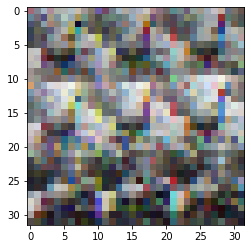

In [31]:
plt.imshow(X[6].reshape(32,32,3))
plt.show()

### Standardize the images 

In [33]:
# center the data 
#suBtract the mean and divide by the standard deviation 

In [32]:
X= X-X.mean(axis=0)

In [34]:
X= X/np.std(X, axis=0)

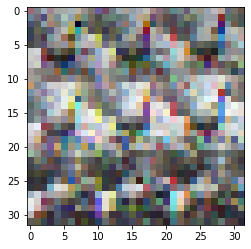

In [35]:
def show(i):
    #reshape images to be 32X32
    i = i.reshape((32,32,3))
    
    #find the min and max value of the pixel intensities
    m, M = i.min(), i.max()
    
    #scale all pixels to be between 0 and 1    
    plt.imshow((i - m)/(M - m))
    plt.show()
    
show(X[6])

### Whitening 

In [36]:
# select the first 1000 images 


In [37]:
X_subset = X[:1000]
X_subset.shape

(1000, 3072)

In [38]:
# calculate the covariance matrix 
cov = np.cov(X_subset, rowvar = True)

In [39]:
cov.shape

(1000, 1000)

In [40]:
# decompose matrix using singular value decomposition 
U, S, V = np.linalg.svd(cov)

In [41]:
print(U.shape)
print(S.shape)
print(V.shape)

(1000, 1000)
(1000,)
(1000, 1000)


In [43]:
zca_matrix = np.dot(U, np.dot(np.diag(1.0/np.sqrt(S+(1e-5))),U.T))

In [45]:
zca_matrix.shape

(1000, 1000)

In [46]:
# multiply the principal component by original images 
zca = np.dot(zca_matrix,X_subset)

In [48]:
zca.shape

(1000, 3072)

every image will have decorelated feature 

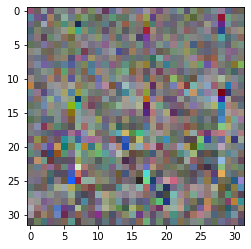

In [50]:
show(zca[6])